In [1]:
!pip install "gymnasium[mujoco]"
!pip install mpi4py

In [2]:
import os
import subprocess
import torch
from matplotlib import pyplot as plt
import gymnasium as gym
import numpy as np
import pandas as pd

In [3]:
env_file = 'model_downloader.py'
env_url = "https://raw.githubusercontent.com/alibaniasad1999/master-thesis/main/Code/Python/utils/model_downloader.py"

if not os.path.isfile(env_file):
    print(f"Downloading {env_file} ...")
    subprocess.run(
        ['wget', '-q', '-O', env_file, env_url],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.DEVNULL
    )
    print(f"{env_file} downloaded.")
else:
    print(f"{env_file} already exists.")

from model_downloader import download_file, download_everything

trajectory = download_everything('ddpg, TBP, zs_ddpg, models, zs_models')

from Zero_Sum_DDPG import setup_logger_kwargs, MLPActorCritic, DG_DDPG
from DDPG import DDPG
import TBP
from TBP import ThreeBodyEnv

model_downloader.py already exists.
trajectory.csv already exists.
Trajectory head:
   0.87018  -0.059444  0  -0.010472  -0.17514  0.1
0  0.87018  -0.059540  0  -0.010536  -0.17494    0
1  0.87017  -0.059636  0  -0.010600  -0.17474    0
2  0.87017  -0.059732  0  -0.010664  -0.17454    0
3  0.87016  -0.059828  0  -0.010728  -0.17434    0
4  0.87015  -0.059924  0  -0.010793  -0.17414    0
Data shape: (9999, 6)
TBP.py already exists.
DDPG.py already exists.
Zero_Sum_DDPG.py already exists.
Directory 'model' already exists and is not empty.
model/actor_cuda.pth already exists.
model/q_cuda.pth already exists.
Directory 'model_zs' already exists and is not empty.
model_zs/actor_cuda.pth already exists.
model_zs/q_cuda.pth already exists.
model_zs/q_2_cuda.pth already exists.
model_zs/actor_2_cuda.pth already exists.
trajectory.csv already exists.
Directory 'utils' already exists.
Directory 'model' already exists and is not empty.
File model/actor_cuda.pth already exists; skipping download.


In [4]:
# Common hyperparameters and settings
hid = 32
l = 2
seed = 0
epochs = 50
exp_name = 'ddpg'
steps_per_epoch = 30000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

ac_kwargs = dict(hidden_sizes=[hid] * l)
logger_kwargs = setup_logger_kwargs(exp_name, seed)


In [5]:
# Helper function to create the environment
def make_env(error_range=0.01, final_range=0.001):
    return ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/time_delay/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "first_player_epoch":	50,
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/time_delay/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([0.1690])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<Zero_Sum_DDPG.DG_DDPG object at 0x15de0

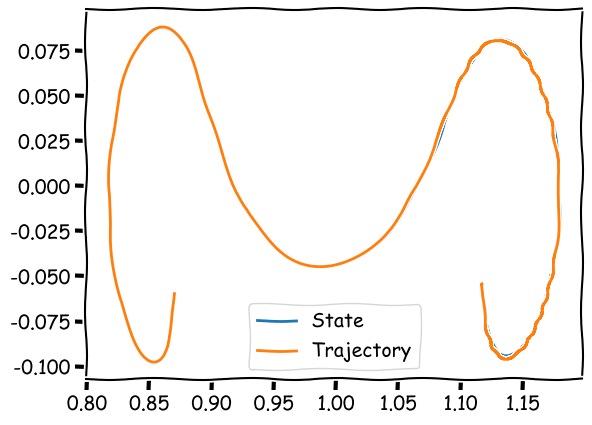

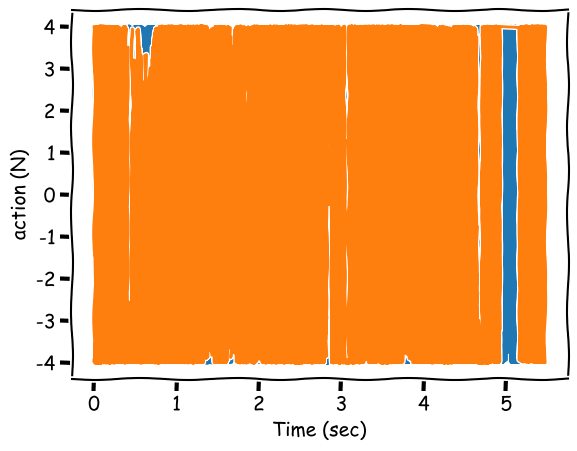

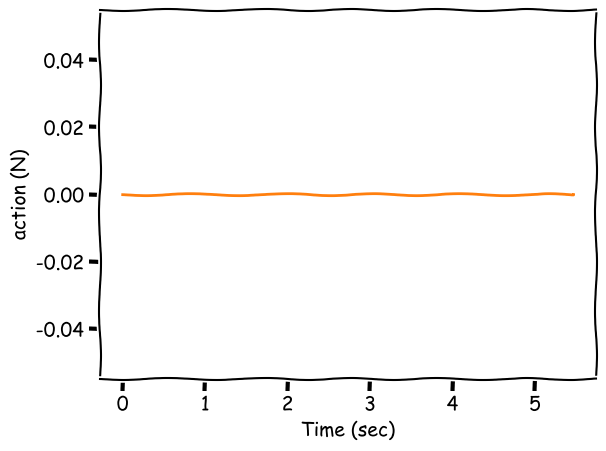

In [6]:
ddpg_zs = DG_DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,
    ac_kwargs_=ac_kwargs,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000,
    first_player_epoch=50
)

ddpg_zs.load(filepath='model_zs/', from_device_to_load='cuda')
ddpg_zs.test(fun_mode=True)
ddpg_zs.env.second_player = False

Logging data to /Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/time_delay/data/ddpg/ddpg_s0/progress.txt
Saving config:

{
    "ac_kwargs_":	{
        "hidden_sizes":	[
            32,
            32
        ]
    },
    "act_dim":	2,
    "act_noise":	0.1,
    "actor_critic":	"MLPActorCritic",
    "batch_size":	1024,
    "device_":	"cpu",
    "env_fn":	"make_env",
    "epochs_":	50,
    "exp_name":	"ddpg",
    "gamma_":	0.99,
    "logger_kwargs_":	{
        "exp_name":	"ddpg",
        "output_dir":	"/Users/Ali/Documents/BAI/Master/master-thesis/Code/Python/Robust_eval/DDPG/time_delay/data/ddpg/ddpg_s0"
    },
    "max_ep_len":	6000,
    "num_test_episodes":	10,
    "obs_dim":	[
        4
    ],
    "p":	"Parameter containing:\ntensor([-0.1749])",
    "pi_lr":	0.001,
    "polyak":	0.995,
    "q_lr":	0.001,
    "replay_size":	1000000,
    "save_freq":	1,
    "seed_":	0,
    "self":	{
        "<DDPG.DDPG object at 0x15de07510>":	{
            "ac":	{
          

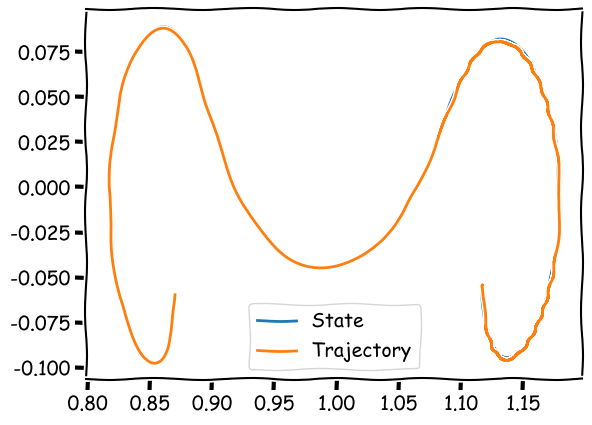

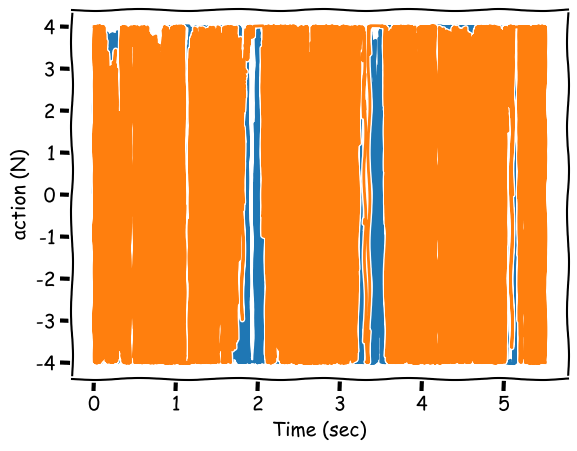

In [7]:
ddpg = DDPG(
    env_fn=make_env,
    actor_critic=MLPActorCritic,
    ac_kwargs_=ac_kwargs,
    seed_=seed,
    steps_per_epoch=steps_per_epoch,
    epochs_=epochs,
    logger_kwargs_=logger_kwargs,
    device_=device,
    batch_size=1024,
    start_steps=5000,
    update_after=1000,
    update_every=2000
)

ddpg.load(from_device_to_load='cuda')
ddpg.test(fun_mode=True)
ddpg.env.second_player = False

In [19]:
class ActionLatencyWithNoiseWrapper(gym.Wrapper):
    """
    Gym environment wrapper that adds both action latency and actuator noise.
    This wrapper supports the Gymnasium API where:
      - reset returns: (observation, info)
      - step returns: (observation, reward, terminated, truncated, info)
    """

    def __init__(self, env, delay_steps=3, disturbance_std=0.05):
        super(ActionLatencyWithNoiseWrapper, self).__init__(env)
        self.delay_steps = delay_steps  # Number of steps to delay actions
        self.disturbance_std = disturbance_std  # Standard deviation of noise added to actions
        self.last_action = None
        self.action_buffer = []

    def reset(self, **kwargs):
        result = self.env.reset(**kwargs)
        if isinstance(result, tuple):
            obs, info = result
            return obs, info
        else:
            return result

    def step(self, action):
        """
        Adds both latency (delayed actions) and actuator noise to the action.
        """
        if len(self.action_buffer) < self.delay_steps:
            # Buffer the action until it is executed after the delay
            self.action_buffer.append(action)
            return self.env.step(self.last_action if self.last_action is not None else action)
        else:
            # Execute the delayed action
            self.last_action = self.action_buffer.pop(0)
            self.action_buffer.append(action)
            action_with_noise = self._apply_noise(self.last_action)
            obs, reward, terminated, truncated, info = self.env.step(action_with_noise)
            return obs, reward, terminated, truncated, info

    def _apply_noise(self, action):
        """
        Adds Gaussian noise to the action to simulate actuator noise.
        """
        action = np.array(action)
        noise = np.random.normal(0, self.disturbance_std, size=action.shape)
        return np.clip(action + noise, self.env.action_space.low, self.env.action_space.high)


def make_env_latency_with_noise(error_range=0.01, final_range=0.001, delay_steps=3, disturbance_std=0.05):
    """
    Creates the ThreeBodyEnv wrapped with both action latency and actuator noise.
    """
    env = ThreeBodyEnv(trajectory, error_range=error_range, final_range=final_range)
    return ActionLatencyWithNoiseWrapper(env, delay_steps=delay_steps, disturbance_std=disturbance_std)


In [20]:
def run_episode(agent, env_fn, max_steps=10000):
    """
    Run one episode using the given agent and environment function.
    Adapted for Gymnasium (reset returns (obs, info) and step returns five outputs).

    Returns:
        total_reward: Sum of rewards collected in the episode.
    """
    env = env_fn()

    obs, _ = env.reset()  # Gymnasium reset returns (obs, info)
    total_reward = 0.0
    steps = 0
    done = False
    env.second_player = False

    while not done and steps < max_steps:
        # Assume the agent provides an 'act' method to select actions
        action = agent.get_action(obs, 0)
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated  # Determine if the episode is done
        total_reward += reward
        steps += 1

    env.close()
    return total_reward


def evaluate_agent(agent, env_fn, num_episodes=20, max_steps=10000):
    """
    Evaluate the agent over multiple episodes and collect cumulative rewards.

    Returns:
        returns: List of cumulative rewards from each episode.
    """
    returns = []
    for i in range(num_episodes):
        ret = run_episode(agent, env_fn, max_steps)
        returns.append(ret)
        print(f"{i} of {num_episodes}")
    return returns


[-0.00850599  0.00529672 -0.025236    0.00163188]
idx 0.05345 state 0.027201573904061138
too much error 🥲😱
second player was in the game
0 of 20
[-0.00716143 -0.00702187 -0.03108584 -0.0133907 ]
idx 0.06495 state 0.035302026103462024
too much error 🥲😱
second player was in the game
1 of 20
[-0.00324637 -0.00950601 -0.04765096 -0.04991362]
idx 0.06192 state 0.06973440403285262
too much error 🥲😱
second player was in the game
2 of 20
done 🥺
second player was in the game
3 of 20
[-0.00881519  0.00475103 -0.02442747  0.00332635]
idx 0.05354 state 0.026609127172600087
too much error 🥲😱
second player was in the game
4 of 20
done 🥺
second player was in the game
5 of 20
[-0.00849348  0.00527929 -0.02474416  0.00213092]
idx 0.05338 state 0.026773575128002422
too much error 🥲😱
second player was in the game
6 of 20
[-0.0087265   0.00493785 -0.0252865   0.00581048]
idx 0.05312 state 0.027815521449564225
too much error 🥲😱
second player was in the game
7 of 20
[-0.00856124  0.00516929 -0.0248212  -0.0

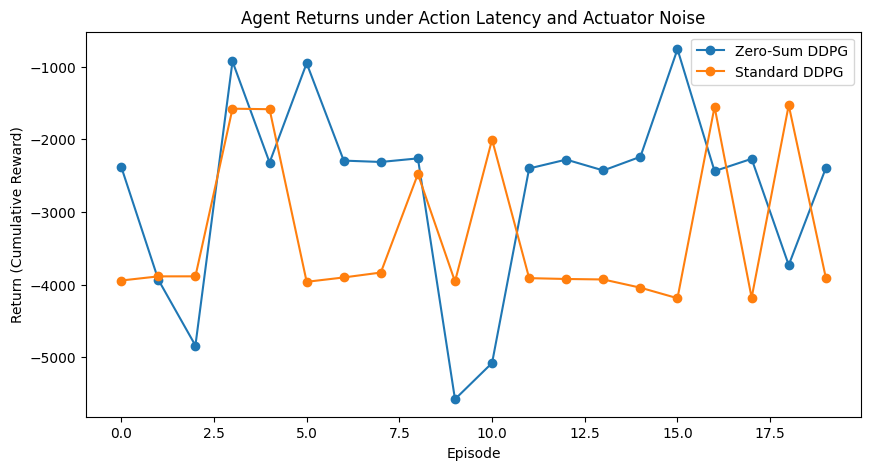

In [29]:

# Number of episodes for evaluation
num_episodes = 20

# Update the agents' environment function to use both action latency and actuator noise
ddpg_zs.env_fn = lambda: make_env_latency_with_noise(delay_steps=50, disturbance_std=0.5)
ddpg.env_fn = lambda: make_env_latency_with_noise(delay_steps=50, disturbance_std=0.5)

# Evaluate Zero-Sum DDPG and Standard DDPG agents with action latency and actuator noise
returns_zs_latency_noise = evaluate_agent(ddpg_zs, ddpg_zs.env_fn, num_episodes=num_episodes)
returns_std_latency_noise = evaluate_agent(ddpg, ddpg.env_fn, num_episodes=num_episodes)

# Calculate and print average returns
avg_return_zs_latency_noise = np.mean(returns_zs_latency_noise)
avg_return_std_latency_noise = np.mean(returns_std_latency_noise)

print("Zero-Sum DDPG with Action Latency and Actuator Noise Average Return:", avg_return_zs_latency_noise)
print("Standard DDPG with Action Latency and Actuator Noise Average Return:", avg_return_std_latency_noise)

# Plot the returns for visual comparison
plt.figure(figsize=(10, 5))
plt.plot(returns_zs_latency_noise, marker='o', label='Zero-Sum DDPG')
plt.plot(returns_std_latency_noise, marker='o', label='Standard DDPG')
plt.xlabel('Episode')
plt.ylabel('Return (Cumulative Reward)')
plt.title('Agent Returns under Action Latency and Actuator Noise')
plt.legend()
plt.show()


[[-2379.306351033603, -3932.2885776008184, -4837.071992481569, -928.3045112472987, -2319.396433106147, -953.2167692311045, -2293.005398066315, -2311.6692974227326, -2262.337887747429, -5575.954787936575, -5077.368628329085, -2400.9209627170976, -2279.002103496521, -2428.6771436078784, -2240.3534605076375, -760.416860602636, -2437.494240015406, -2268.3690608937636, -3730.500421649357, -2397.1432350092136], [-3942.7001026374323, -3885.68456221188, -3885.1453860905103, -1578.506698954005, -1585.8709486243142, -3960.5548533872507, -3900.5634942222305, -3833.140756380051, -2477.9245210783315, -3956.178674233482, -2003.5423007091763, -3910.0032655790383, -3921.6347636433175, -3928.2800602651764, -4041.2453711450216, -4186.184320009475, -1552.8651119349588, -4179.488979856453, -1530.5883095400368, -3903.0143447786327]]


/var/folders/cf/x6zpxdwn2dg40q0c0r418f7c0000gp/T/ipykernel_3587/584570146.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])


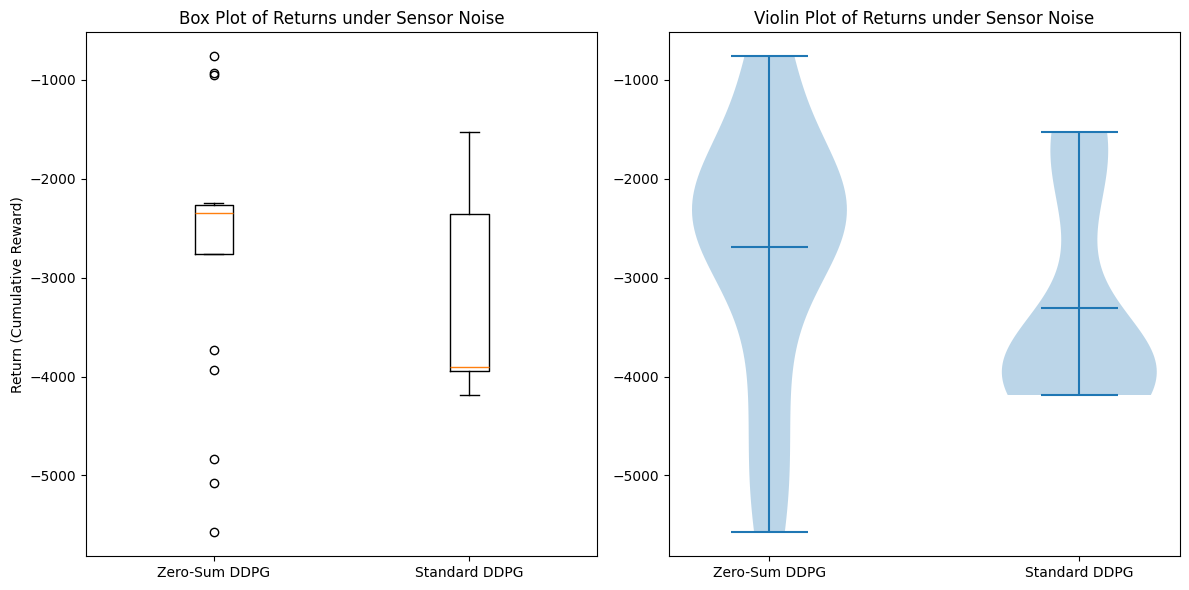

In [32]:
# Assume returns_zs and returns_std are lists of cumulative rewards from multiple episodes
data = [returns_zs_latency_noise, returns_std_latency_noise]
print(data)

# Create a figure with two subplots side-by-side
plt.figure(figsize=(12, 6))

# Box Plot
plt.subplot(1, 2, 1)
plt.boxplot(data, labels=['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Box Plot of Returns under Sensor Noise')
plt.ylabel('Return (Cumulative Reward)')

# Violin Plot
plt.subplot(1, 2, 2)
plt.violinplot(data, showmeans=True)
plt.xticks([1, 2], ['Zero-Sum DDPG', 'Standard DDPG'])
plt.title('Violin Plot of Returns under Sensor Noise')

plt.tight_layout()
plt.show()


In [34]:
df  = pd.DataFrame(np.array(data).T, columns=['Zero-Sum DDPG', 'Standard DDPG'])
df.head()

,Zero-Sum DDPG,Standard DDPG
0,-2379.306351,-3942.700103
1,-3932.288578,-3885.684562
2,-4837.071992,-3885.145386
3,-928.304511,-1578.506699
4,-2319.396433,-1585.870949


In [24]:
# save csv
df.to_csv('evaluation_returns.csv', index=False)